In [1]:
import pandas_datareader as pdr

from tqdm import tqdm
from datetime import datetime
import pickle

import numpy as np
import pandas as pd

import seaborn as sns

## Составляющие индекса S&P500
S&P 500 — фондовый индекс, в корзину которого включено 505 акций 500 избранных торгуемых на фондовых биржах США публичных компаний, имеющих наибольшую капитализацию.

The S&P 500 component weights:
https://www.slickcharts.com/sp500

In [5]:
sp500_index = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500_companies = sp500_index[0]

In [6]:
# get_nasdaq_symbols().query('ETF==True')

In [7]:
sp500_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 505 non-null    object
 1   Security               505 non-null    object
 2   SEC filings            505 non-null    object
 3   GICS Sector            505 non-null    object
 4   GICS Sub-Industry      505 non-null    object
 5   Headquarters Location  505 non-null    object
 6   Date first added       460 non-null    object
 7   CIK                    505 non-null    int64 
 8   Founded                505 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.6+ KB


In [8]:
sp500_companies.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [9]:
sp500_companies.to_csv('data/SP500_companies.csv')

In [ ]:
# pd.to_datetime(sp500_companies['Date first added'], format="%Y-%m-%d")

In [10]:
symbols = list(sp500_companies['Symbol'])
symbols

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'AIG',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMC

In [2]:
start = datetime(2018, 1, 1)
end = datetime(2022, 3, 1)

In [12]:
def get_data_from_tickers(tickers):
    data = {}
    for ticker in tqdm(tickers):
        try:
            data[ticker] = pdr.data.get_data_yahoo(ticker, adjust_dividends=False, start=start, end=end)
        except Exception as e:
            print(f'Error occurred with ticker {ticker}: {e}')
    return data

In [13]:
data_for_symbols = get_data_from_tickers(symbols)

 13%|█▎        | 65/505 [02:36<14:17,  1.95s/it]  

Error occurred with ticker BRK.B: 'Date'


 16%|█▌        | 81/505 [03:09<13:51,  1.96s/it]

Error occurred with ticker BF.B: 'Date'


 51%|█████     | 257/505 [10:21<14:27,  3.50s/it]

Error occurred with ticker IFF: 'Date'


 77%|███████▋  | 388/505 [18:18<08:26,  4.33s/it]

Error occurred with ticker PEG: 'Date'


 77%|███████▋  | 390/505 [18:26<08:23,  4.38s/it]

Error occurred with ticker PSA: 'Date'


 80%|████████  | 406/505 [19:20<05:50,  3.54s/it]

Error occurred with ticker RHI: 'Date'


 82%|████████▏ | 416/505 [19:48<04:48,  3.25s/it]

Error occurred with ticker STX: 'Date'


 86%|████████▋ | 436/505 [20:49<04:40,  4.06s/it]

Error occurred with ticker SNPS: 'Date'


 90%|█████████ | 455/505 [22:07<03:03,  3.67s/it]

Error occurred with ticker TRV: 'Date'


 92%|█████████▏| 465/505 [22:45<03:33,  5.33s/it]

Error occurred with ticker UA: 'Date'


 94%|█████████▍| 477/505 [23:31<01:52,  4.02s/it]

Error occurred with ticker VRTX: 'Date'


 95%|█████████▍| 479/505 [23:47<02:29,  5.76s/it]

Error occurred with ticker VTRS: 'Date'


 95%|█████████▌| 482/505 [23:58<01:39,  4.33s/it]

Error occurred with ticker VMC: 'Date'


 98%|█████████▊| 493/505 [24:52<00:50,  4.24s/it]

Error occurred with ticker WRK: 'Date'


 99%|█████████▉| 500/505 [25:15<00:18,  3.71s/it]

Error occurred with ticker XYL: 'Date'


100%|█████████▉| 503/505 [25:30<00:09,  4.75s/it]

Error occurred with ticker ZBH: 'Date'


100%|██████████| 505/505 [25:36<00:00,  3.04s/it]


In [11]:
# with open('data/sp500_data.pickle', 'rb') as f:
#     data_for_symbols = pickle.load(f)

1048.0


<AxesSubplot:ylabel='Count'>

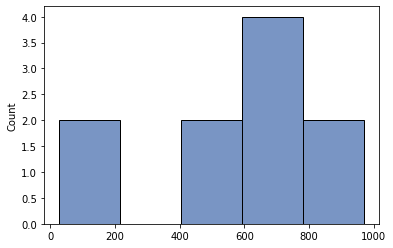

In [14]:
observations = [len(data_for_symbols[k]) for k in data_for_symbols.keys()]
counts = filter(lambda x: x < np.median(observations), observations)
print(np.median(observations))
sns.histplot(x=counts)

### Убираем компании с количеством записей меньше медианы

In [14]:
data_for_symbols = {k: v for k, v in data_for_symbols.items() if len(v) >= np.median(observations)}
with open('data/sp500_data.pickle', 'wb') as f:
    pickle.dump(data_for_symbols, f)

In [15]:
print('Размер отфильтрованного индекса S&p500: ', len(data_for_symbols))

Размер отфильтрованного индекса S&p500:  493


In [16]:
sp_close_prices = {k: v['Close'] for k, v in data_for_symbols.items()}
sp_close_prices = pd.DataFrame(sp_close_prices)
sp_close_prices.to_csv('data/sp_close_prices.csv')

## Данные индекса S&P500

In [10]:
sp500_prices = pdr.data.get_data_yahoo('^GSPC', adjust_dividends=False, start=start, end=end)

<AxesSubplot:xlabel='Date'>

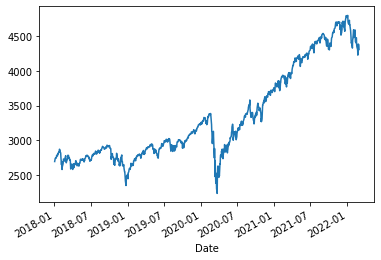

In [11]:
sp500_prices['Close'].plot()

In [12]:
sp500_prices['Close'].to_csv('data/sp500.csv')